### Chemical Engineering Laboratory
# Thermal Separation


### __Set up the Python environment__

We begin, as always, by loading the libraries `numpy`, `matplotlib` and `scipy`. You can execute cells with the key combination `ctrl`+`Enter`. With `shift`+`Enter`, you can execute and automatically jump to the next cell.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

### __Data to collect during the laoraty__
(Group A)
1. Take samples on each stage, the feed, the bottoms and the distillate.
2. Note down the following values: \
   a) temperatures on each stage, the feed, the bottoms and the distillate. \
   b) power of the two heaters. \
   c) cooling water flow rate, inlet and outlet temperature. \
   d) start and end times for volume flow measurements of feed, bottoms and distillate. \
   e) absolute pressure (QFE) of the time of the experiments from the next weather station. (https://www.meteoswiss.admin.ch/services-and-publications/applications/measurement-values-and-measuring-networks.html#param=messwerte-luftdruck-qfe-10min&table=false)

(Group B)
1. Obtain samples taken from group A and measure their composition with the refractometer. 

Make sure all your filled all fields and don't forget to exchange data with the other group later!

In [39]:
#"G:\04_Teaching\Chemical Engineering Laboratory\01_documents\05_Reports\HS2023\Group_5_Report_distillation_CIW_HS_23_ihengartner_beberle.pdf"
# Define the temperature data for each reflux ratio
T = pd.DataFrame({
    'stage': ['distillate', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'feed', '11', '12', '13', '14', '15', 'bottoms'],
    'R_1': [    ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ],                # °C, temperature for R_1
    'R_2': [    ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ]})               # °C, temperature for R_2
T.set_index('stage', inplace=True)

# Define the refractive index data for each reflux ratio
n = pd.DataFrame({
    'stage': ['distillate', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'feed', '11', '12', '13', '14', '15', 'bottoms'],
    'R_1': [    ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ],  # Refractive index for R_1
    'R_2': [    ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ,   ]})   # Refractive index for R_2
n.set_index('stage', inplace=True)

# Define the heat input data
Q_reb = pd.DataFrame({
    'property': ['Q_reb'],
    'R_1': [    ],  # W
    'R_2': [    ]})   # W
Q_reb.set_index('property', inplace=True)

# Define the intermediate heating data
Q_int = pd.DataFrame({
    'property': ['Q_int'],
    'R_1': [    ],  # W
    'R_2': [    ]})   # W
Q_int.set_index('property', inplace=True)

# Define the cooling water properties
cooling_water = pd.DataFrame({
    'property': ['V_dot', 'T_water_in', 'T_water_out'],
    'R_1': [    ,   ,   ],  # l/h, K
    'R_2': [    ,   ,   ]})   # l/h, K
cooling_water.set_index('property', inplace=True)

# Define the feed flow rate data
feed= pd.DataFrame({
    'property': ['delta_t', 'V', 'flow_rate'],
    'R_1': [    ,   ,   ],  # s, l, l/s
    'R_2': [    ,   ,   ]})   # s, l, l/s
feed.set_index('property', inplace=True)

# Define the bottoms flow rate data
bottoms = pd.DataFrame({
    'property': ['delta_t', 'V', 'flow_rate'],
    'R_1': [    ,   ,   ],  # s, l, l/s
    'R_2': [    ,   ,   ]})   # s, l, l/s
bottoms.set_index('property', inplace=True)

# Define the distillate flow rate data
distillate = pd.DataFrame({
    'property': ['delta_t', 'V', 'flow_rate'],
    'R_1': [    ,   ,   ],  # s, l, l/s
    'R_2': [    ,   ,   ]})   # s, l, l/s
distillate.set_index('property', inplace=True)

# Ambient absolute pressure 
p_amb =  [  ] # bar

You can inspect your tables/matrices with the print command. Just look into different variables. This is a useful feature to inspect your data later in the notebook.

In [ ]:
print(T)


### __1. Calculating the 2-Propanol Mass Fractions__

You measured the refractive indices of the samples for all stages the feed, the bottoms and the distillate. Since we deal with a binary mixture, the refraction index directly correlates to the composition of the samples. In the code cell below, you already find some written code. You just have to insert the expression to convert from the refractive index to mole fractions. Assume an ideal mixture. Fields which require input from you are always indicated with `#%------> insert formula here`.

In [41]:
n_2propanol = 1.3776 
n_2butanol = 1.3978

def refractive_index_to_mole_fraction(n, n_2propanol, n_2butanol):
    """
    Convert refractive index to mole fraction.

    This function calculates the mole fraction of 2-propanol in a mixture
    based on the refractive index of the mixture. It uses the refractive
    indices of pure 2-propanol and pure 2-butanol for the calculation.

    Parameters:
    n (float): Refractive index of the mixture.
    n_2propanol (float): Refractive index of pure 2-propanol.
    n_2butanol (float): Refractive index of pure 2-butanol.

    Returns:
    float: Mole fraction of 2-propanol in the mixture.
    """
    return #---------------------------------------------------------------------------------------> insert formula here

# Convert refractive index to mole fraction for each reflux ratio
x_2propanol = n.apply(lambda x: refractive_index_to_mole_fraction(x, n_2propanol, n_2butanol))

print(x_2propanol)

                 R_1       R_2
stage                         
distillate  0.980198  1.029703
1           0.985149  1.029703
2           0.985149  1.004950
3           0.980198  0.980198
4           0.980198  0.980198
5           0.955446  0.930693
6           0.930693  0.881188
7           0.905941  0.881188
8           0.881188  0.881188
9           0.881188  0.881188
10          0.831683  0.831683
feed        0.782178  0.732673
11          0.782178  0.831683
12          0.732673  0.831683
13          0.608911  0.757426
14          0.534653  0.732673
15          0.336634  0.534653
bottoms     0.188119  0.336634


### __2. Mass Balances__

Compare the experimental flow rates to the calculated ones using the overall mass balance around the column. Determine the deviation `delta` for the mass balance. You just have to enter the expression for the mass balance at the given location and execute the cell. 

a) What value would you expect for `delta` in an ideal world?
 
b) Check your results and comment on potential deviations.

In [42]:
# Create a DataFrame to store the mass balance results for each reflux ratio
delta = pd.DataFrame(index=['delta'], columns=['R_1', 'R_2'])

def mass_balance(F, B, D):
    """
    Calculate the mass balance for a distillation column.

    This function calculates the mass balance for a distillation column
    based on the flow rates of the feed, bottoms, and distillate streams.

    Parameters:
    F (float): Flow rate of the feed stream.
    B (float): Flow rate of the bottoms stream.
    D (float): Flow rate of the distillate stream.

    Returns:
    float: Mass balance difference.
    """
    return #---------------------------------------------------------------------------------------> insert formula here

# Loop through each column (reflux ratio) in the feed DataFrame
for R in feed.columns:
    # Extract the flow rates for feed, bottoms, and distillate for the current reflux ratio
    F = feed[R]['flow_rate']
    B = bottoms[R]['flow_rate']
    D = distillate[R]['flow_rate']
    
    # Calculate the mass balance for the current reflux ratio
    delta[R] = mass_balance(F, B, D)

# Print the mass balance results
print(f"Mass balance difference:\n{delta}")


Mass balance difference:
         R_1    R_2
delta  0.001  0.001


### __3. Energy Balance__

Set up an energy balance around the column with your measured values.

a) State the necessary assumptions to be able to calculate the energy loss `Q_loss` around the column. 

b) (Report) Draw the corresponding system boundaries on the process diagram. 

c) Determine the energy loss `Q_loss` around the column. \
Use the given structure and enter an expression for the loss over the column. The for loop is executed once for each reflux ratio `R`. You can access values of the table the same way as in matlab by entering the variable name in brackets `[]`. You can also have a look in the cell above for a practical example. 

b) State three design measures to reduce the specific heat loss over the column.

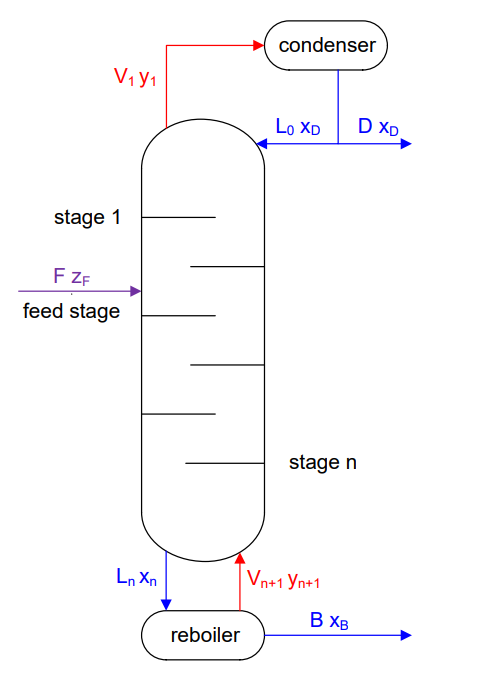

In [43]:
# Create a DataFrame to store the energy balance results for each reflux ratio
Q_loss = pd.DataFrame(index=['Q_loss'], columns=['R_1', 'R_2'])

# Loop through each column (reflux ratio) in the Q_loss DataFrame
for R in Q_loss.columns:
    # Calculate the energy balance for the current reflux ratio, check above for the correct notation to access values from the DataFrames/Tables
    Q_loss[R] = #---------------------------------------------------------------------------------------> insert formula here

# Display the energy balance results
print(f"Energy loss over the column:\n{Q_loss}")

Energy loss over the column:
        R_1  R_2
Q_loss -130 -130


### __4. Temperature and Composition over the Column__
Execute the cell below to visualize your temperature and composition measurements over all stages for both reflux ratios. Index 1 is typically used for the light boiler (the component which evaporates first). This corresponds to 2-Propanol in our case.

a) How are the the temperature and the composition connected?

b) What general trend should we expect for the temperature and composition over the stages?

c) Coment on your results and potential deviations. What could be the reason?

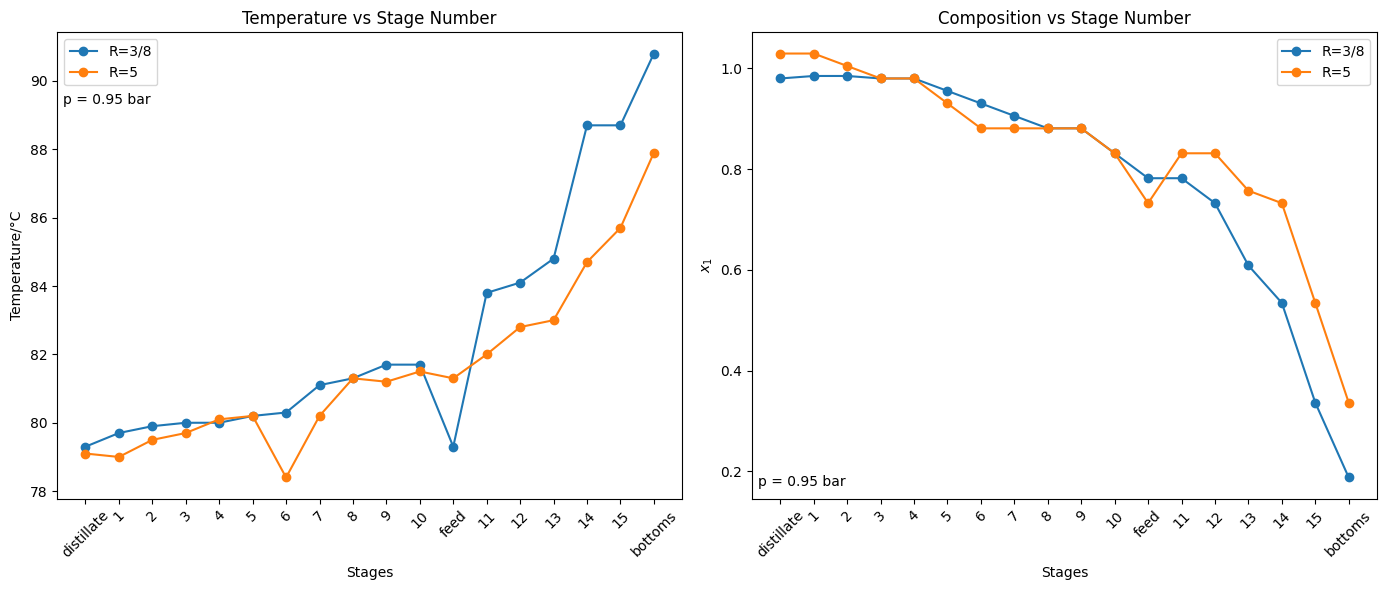

In [44]:
# Create a figure with two subplots arranged horizontally
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the temperature over the stage number
ax1.plot(T.index, T['R_1'], marker='o', color='C0', label='R=3/8')
ax1.plot(T.index, T['R_2'], marker='o', color='C1', label='R=5')
ax1.set_xlabel('Stages')
ax1.set_ylabel('Temperature/°C')
ax1.set_title('Temperature vs Stage Number')
ax1.set_xticks(range(len(T.index)))
ax1.set_xticklabels(T.index, rotation=45)  # Rotate x-axis labels for better readability
ax1.legend()
ax1.text(0.01, 0.87, f'p = {p_amb} bar', transform=ax1.transAxes, fontsize=10, verticalalignment='top')

# Plot the composition over the stage number
ax2.plot(x_2propanol.index, x_2propanol['R_1'], marker='o', color='C0', label='R=3/8')
ax2.plot(x_2propanol.index, x_2propanol['R_2'], marker='o', color='C1', label='R=5')
ax2.set_xlabel('Stages')
ax2.set_ylabel('$x_{1}$')
ax2.set_title('Composition vs Stage Number')
ax2.set_xticks(range(len(x_2propanol.index)))
ax2.set_xticklabels(x_2propanol.index, rotation=45)  # Rotate x-axis labels for better readability
ax2.legend()
ax2.text(0.01, 0.05, f'p = {p_amb} bar', transform=ax2.transAxes, fontsize=10, verticalalignment='top')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### __5. T-x Diagram__

Raoults law allows for a simplified description of the phase equilibrium. The necessary activity coefficients can be calculated with the vanLaar equations and saturation pressures are obtained with the Antoine equation. 

a) Complete these functions with the corresponding expressions for the three equations. Note the input and output variables of each function (`def`).

b) Look up the Antoine parameters at the NIST website for the appropiate temperature range. What's the expected temperature range? Hint: pay attention to the units!

In [45]:
def antoine_equation(T, A, B, C):
    """
    Calculate the vapor pressure using the Antoine equation.
    
    Parameters:
    T (float): Temperature in degrees Celsius
    A (float): Antoine equation constant A
    B (float): Antoine equation constant B
    C (float): Antoine equation constant C
    
    Returns:
    float: Vapor pressure in bar
    """
    return #---------------------------------------------------------------------------------------> insert formula here

# Parameters Antoine equation for bar
antoine_2propanol = {'A':   , 'B':  , 'C':  } #---------------------------------------------------------------------------------------> insert values here
antoine_2butanol = {'A':   , 'B':  , 'C':  } #---------------------------------------------------------------------------------------> insert values here

def van_laar_activity_coefficients(x1, A12, A21):
    """
    Calculate the activity coefficients for a binary mixture using the Van Laar equation.
    
    Parameters:
    x1 (float): Mole fraction of component 1
    A12 (float): Van Laar parameter for component 1 in component 2
    A21 (float): Van Laar parameter for component 2 in component 1
    
    Returns:
    tuple: Activity coefficients (gamma_1, gamma_2)
    """
    x2 = #---------------------------------------------------------------------------------------> insert formula here
    ln_gamma_1 = #---------------------------------------------------------------------------------------> insert formula here
    ln_gamma_2 = #---------------------------------------------------------------------------------------> insert formula here
    gamma_1 = np.exp(ln_gamma_1)                                
    gamma_2 = np.exp(ln_gamma_2)                                
    return gamma_1, gamma_2

# Van Laar parameters for the mixture 2-propanol/2-butanol
A12 = 0.0730
A21 = 0.0785

c) Using the above equations, derive an expression to calculate the temperature for a given composition and ambient pressure. The expression should be temperature-dependent and set equal to zero, allowing it to be solved for temperature (by varying the temperature by the solver) in the subsequent step (see the next code cell). Find one expression for the ideal case and one for the activity-corrected case.

In [46]:
def solve_for_T_ideal(T, p_amb, x1):
    """
    Equation p - x1 * p1_sat(T) - x2 * p2_sat(T) = 0 to solve for T.
    
    Parameters:
    T (float): Temperature in degrees Celsius
    p (float): Total pressure in bar
    x1 (float): Molar fraction of 2-propanol
    
    Returns:
    float: The value of the equation to be zeroed
    """
    x2 = #---------------------------------------------------------------------------------------> insert formula here
    p1_sat = antoine_equation(T, **antoine_2propanol)
    p2_sat = antoine_equation(T, **antoine_2butanol)
    return #---------------------------------------------------------------------------------------> insert formula here

def solve_for_T_corrected(T, p, x1, gamma_1, gamma_2):
    """
    Equation p - x1 * gamma_1 * p1_sat(T) - x2 * gamma_2 * p2_sat(T) = 0 to solve for T.
    
    Parameters:
    T (float): Temperature in degrees Celsius
    p (float): Total pressure in bar
    x1 (float): Molar fraction of 2-propanol
    gamma_1 (float): Activity coefficient for 2-propanol
    gamma_2 (float): Activity coefficient for 2-butanol
    
    Returns:
    float: The value of the equation to be zeroed
    """
    x2 = #---------------------------------------------------------------------------------------> insert formula here
    p1_sat = #---------------------------------------------------------------------------------------> insert formula here
    p2_sat = #---------------------------------------------------------------------------------------> insert formula here
    return #---------------------------------------------------------------------------------------> insert formula here

d) Find a suitable initial guess for the temperature `T_initial_guess` and execute the cell below to solve for the temperature and plot it against the composition. How did you pick your initial guess?

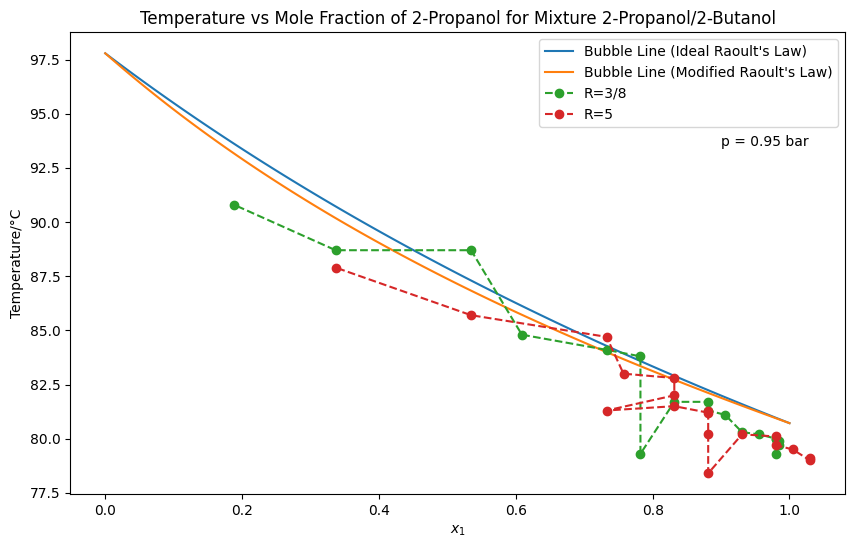

In [47]:
T_initial_guess = #--------------------------------------------------------------------------------> insert value here        # Initial guess for the temperature in degrees Celsius  

x1_discretized = np.linspace(0, 1, 100)                                                 # Generate discretzied x_1 values from 0 to 1 with 100 points for plotting
T_th_ideal = []                                                                         # Initialize an empty list to store the ideal temperature values
for x in x1_discretized:                                                                # Loop through each x_1 value and solve for T
    T_th_ideal.append(fsolve(solve_for_T_ideal, T_initial_guess, args=(p_amb, x))[0])

T_th_corrected = []
for x in x1_discretized:
    gamma_1, gamma_2 = #---------------------------------------------------------------------------------------> insert formula here
    T_th_corrected.append(fsolve(solve_for_T_corrected, T_initial_guess, args=(p_amb, x, gamma_1, gamma_2))[0])

# Create a figure
plt.figure(figsize=(10, 6))
plt.plot(x1_discretized, T_th_ideal, label='Bubble Line (Ideal Raoult\'s Law)')
plt.plot(x1_discretized, T_th_corrected, label='Bubble Line (Modified Raoult\'s Law)')
plt.plot(x_2propanol['R_1'].values, T['R_1'].values, label='R=3/8', linestyle='--', marker='o')
plt.plot(x_2propanol['R_2'].values, T['R_2'].values, label='R=5', linestyle='--', marker='o')
plt.xlabel('$x_{1}$')
plt.ylabel('Temperature/°C')
plt.title('Temperature vs Mole Fraction of 2-Propanol for Mixture 2-Propanol/2-Butanol')
plt.text(0.9, 94, f'p = {p_amb} bar', fontsize=10, verticalalignment='top')
plt.legend()
plt.show()

e) Your measurements are displayed on the same plot. What results do you expect, and what could be the potential reasons for any discrepancies? What's exptected to change with the reflux ratio?

### __5. T-xy Diagram__
With known temperature and liquid phase composition, it's possible to calculate the vapor phase mole fractions `y1` of 2-Propanol for the ideal and activity coefficient corrected case.  

a) Derive this expression and fill in the missing parts in the functions below. 

In [48]:
def calculate_y1_ideal(T, x1, antoine_2propanol, antoine_2butanol):
    """
    Calculate the mole fraction y1 using the Antoine equation.

    Parameters:
    T (float): Temperature in degrees Celsius
    x1 (float): Mole fraction of 2-propanol
    antoine_2propanol (dict): Antoine equation constants for 2-propanol
    antoine_2butanol (dict): Antoine equation constants for 2-butanol

    Returns:
    float: Mole fraction y1
    """
    x2 = #---------------------------------------------------------------------------------------> insert formula here
    p1_sat = #---------------------------------------------------------------------------------------> insert formula here
    p2_sat = #---------------------------------------------------------------------------------------> insert formula here
    y1 = #---------------------------------------------------------------------------------------> insert formula here
    return y1

def calculate_y1_corrected(T, x1, antoine_2propanol, antoine_2butanol, A12, A21):
    """
    Calculate the mole fraction y1 using the Antoine equation and activity coefficients.

    Parameters:
    T (float): Temperature in degrees Celsius
    x1 (float): Mole fraction of 2-propanol
    antoine_2propanol (dict): Antoine equation constants for 2-propanol
    antoine_2butanol (dict): Antoine equation constants for 2-butanol
    A12 (float): Van Laar parameter for component 1 in component 2
    A21 (float): Van Laar parameter for component 2 in component 1

    Returns:
    float: Mole fraction y1
    """
    gamma_1, gamma_2 = #---------------------------------------------------------------------------------------> insert formula here
    p1_sat = #---------------------------------------------------------------------------------------> insert formula here
    p2_sat = #---------------------------------------------------------------------------------------> insert formula here
    y1 = #---------------------------------------------------------------------------------------> insert formula here
    return y1

b) Run the cell below to calculate the vapor phase mole fractions and plot the corresponding x-y diagram for the mixture 2-Propanol/2-Butanol. Comment on the differences of the equilibrium lines for the ideal and the corrected case. Why can we expect such similar results? 

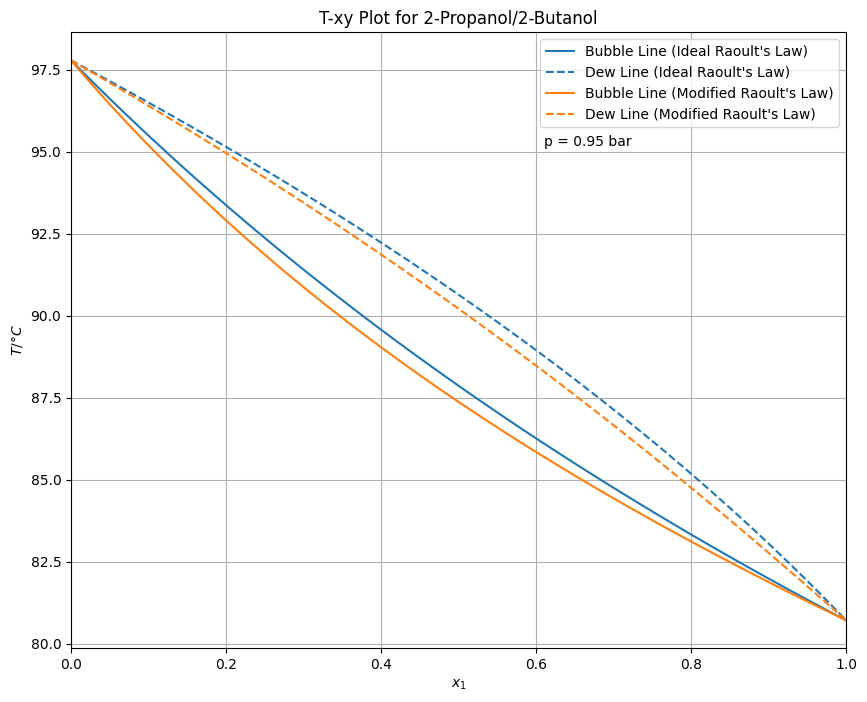

In [49]:
y1_th_ideal = []
for i,x1 in enumerate(x1_discretized):
    T_x1 = T_th_ideal[i]                                    # look up previously calculated ideal temperature for each x1
    y1 = calculate_y1_ideal(T_x1, x1, antoine_2propanol, antoine_2butanol)   
    y1_th_ideal.append(y1)

# Calculate y_1 values with activity coefficients
y1_th_corrected = []
for i,x1 in enumerate(x1_discretized):
    T_x1 = T_th_corrected[i]                                # look up previously calculated corrected temperature for each x1
    y1 = calculate_y1_corrected(T_x1, x1, antoine_2propanol, antoine_2butanol, A12, A21)    
    y1_th_corrected.append(y1)

# Plot the T-xy diagram (VLE plot)
plt.figure(figsize=(10, 8))
plt.plot(x1_discretized, T_th_ideal, label='Bubble Line (Ideal Raoult\'s Law)', color='C0')                          # plot x-y for ideal Raoult's Law
plt.plot(y1_th_ideal, T_th_ideal, linestyle='--', label='Dew Line (Ideal Raoult\'s Law)', color='C0')                 # plot x-y for ideal Raoult's Law
plt.plot(x1_discretized, T_th_corrected, label='Bubble Line (Modified Raoult\'s Law)', color='C1')                  # plot x-y for modified Raoult's Law
plt.plot(y1_th_corrected, T_th_corrected, linestyle='--', label='Dew Line (Modified Raoult\'s Law)', color='C1')     # plot x-y for modified Raoult's Law
plt.xlabel('$x_1$')
plt.ylabel('$T/°C$')
plt.title('T-xy Plot for 2-Propanol/2-Butanol')
plt.xlim(0, 1)
plt.legend()
plt.grid(True)
plt.text(0.61, 95.5, f'p = {p_amb} bar', fontsize=10, verticalalignment='top')
plt.show()

c) Do the vapor and liquid phase compositions differ more in the ideal case or the activity coefficient-corrected case?

d) (Graphically) What are the compositions in both phases for the activity coefficient-corrected case at T = 95 °C?

e) How else could we determine the temperatures for `x_1 = 0` and `x_1 = 1`?

f) Imagine you could freely adjust the shape of the dew and bubble lines. How should they be shaped for optimal separability by distillation? What would the worst-case scenario look like?

### __6. x-y Diagram__

We can also plot all x-y value pairs substituting the temperature. Run the cell below to plot the results.

a) What happens at the x-y line?

b) Imagine again, you could freely adjust the shape of the x-y line. How should it be shaped for optimal separability by distillation and what would the worst-case scenario look like?

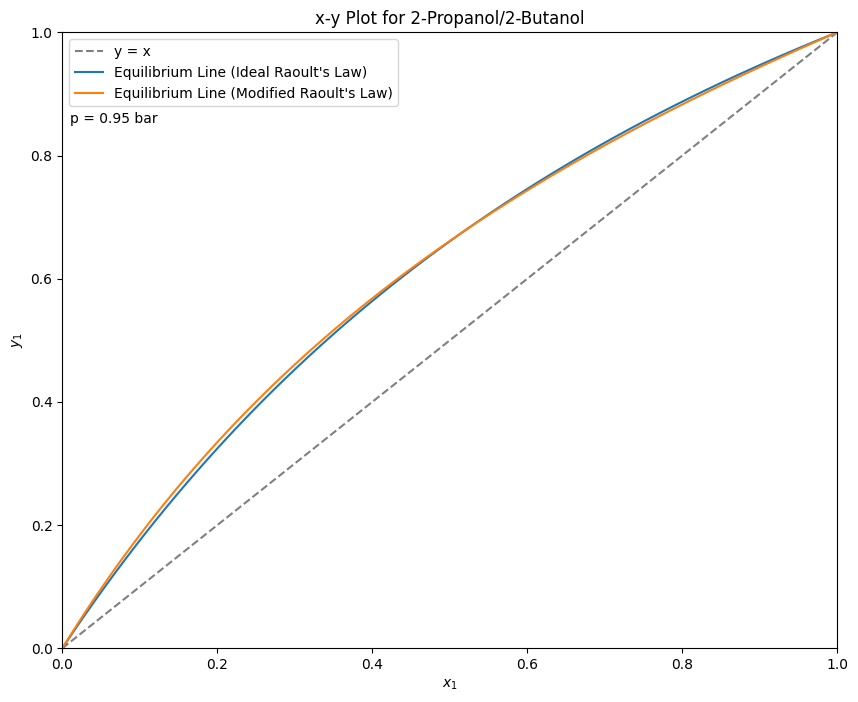

In [50]:
# Plot x_1 vs y_1
plt.figure(figsize=(10, 8))
plt.plot(x1_discretized, x1_discretized, color='grey', linestyle='--', label='y = x')       # plot the parity line (equal vapor and liquid mole fractions)
plt.plot(x1_discretized, y1_th_ideal, label='Equilibrium Line (Ideal Raoult\'s Law)')                          # plot x-y for ideal Raoult's Law
plt.plot(x1_discretized, y1_th_corrected, linestyle='-', label='Equilibrium Line (Modified Raoult\'s Law)')    # plot x-y for modified Raoult's Law
plt.xlabel('$x_{1}$')
plt.ylabel('$y_{1}$')
plt.title('x-y Plot for 2-Propanol/2-Butanol')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.text(0.01, 0.87, f'p = {p_amb} bar', fontsize=10, verticalalignment='top')
plt.legend()
plt.show()

### __7. McCabe-Thiele Construction__

The McCabe-Thiele method is a graphical technique used to analyze and design distillation columns. It provides a graphical approach to determine the number of theoretical stages required for the separation of binary mixtures by plotting equilibrium and operating lines on an x-y diagram, allowing for visual step-off calculations. The objective of this task is to use this method to construct a conceptual design for a distillation column separating a 2-Propanol/2-Butanol mixture, and to compare the results with your measured data.

a) Determine the design parameters. Assume the values you have measured or given in the task description.

In [51]:
# Define the operating conditions of the column
R =         # Reflux ratio              #<-------------------------------------------------------------------------------------- insert value here
xD =        # Distillate composition    #<-------------------------------------------------------------------------------------- insert value here
xB =        # Bottoms composition       #<-------------------------------------------------------------------------------------- insert value here
xF =        # Feed composition          #<-------------------------------------------------------------------------------------- insert value here
q =         # Feed condition            #<-------------------------------------------------------------------------------------- insert value here

b) Fill the missing expressions for the q-line and the rectification line. Check the slides for help.

(0.0, 1.0)

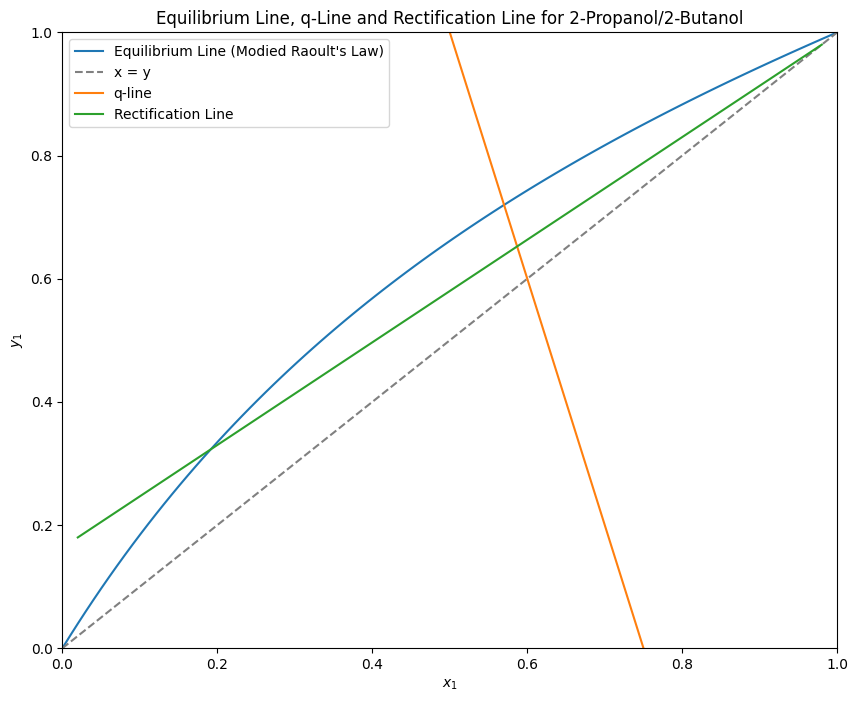

In [52]:
# Plot the equilibrium curve and operating lines
plt.figure(figsize=(10, 8))
plt.plot(x1_discretized, y1_th_corrected, label='Equilibrium Line (Modied Raoult\'s Law)', color='C0')   
plt.plot(x1_discretized, x1_discretized, '--', label='x = y', color='grey')

# Construct and plot the q-line
if q == 1.0:
    plt.axvline(x=xF, linestyle='-', label='q-line', color='C1')                            # for q=1, we need another plotting method to avoid division by zero 
else:
    x_q_line = np.linspace(xB, xD, 100)                                                     # discretize x values for calculation and plotting
    y_q_line = #<-------------------------------------------------------------------------------------- insert formula here
    plt.plot(x_q_line, y_q_line, label='q-line', color='C1')

# Construct and plot the rectification line
x_rectification_line = np.linspace(xB, xD, 100)                                             # discretize x values for calculation and plotting 
y_rectification_line = #<-------------------------------------------------------------------------------------- insert formula here
plt.plot(x_rectification_line, y_rectification_line, label='Rectification Line', color='C2')

plt.xlabel('$x_{1}$')
plt.ylabel('$y_{1}$')
plt.title('Equilibrium Line, q-Line and Rectification Line for 2-Propanol/2-Butanol')
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, 1)

c) The stripping line is constructed with the intersection point of the q-line and the rectification line. Why is that? (If you're unsure right now, you can revisit this question after completing the entire construction.)

d) Find an expression = 0 for the intersection of those lines, solve for x to obtain `x_intersection`. From there, determine `y_intersection`. Hint: Which operating lines do these points lie on?

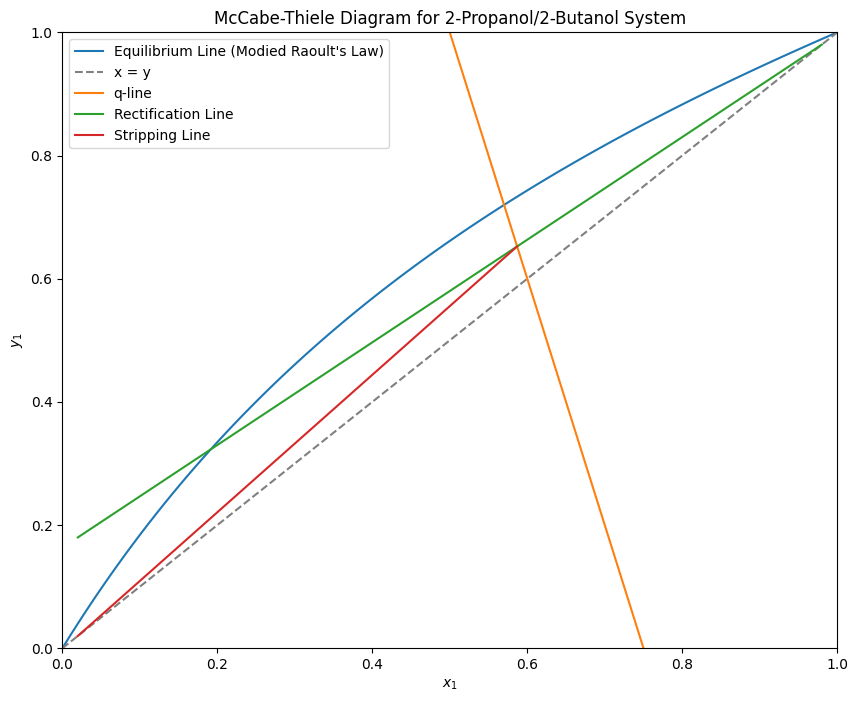

In [53]:
## Plot the previously constructed lines, this is the same as the previous plot
plt.figure(figsize=(10, 8))
plt.plot(x1_discretized, y1_th_corrected, label='Equilibrium Line (Modied Raoult\'s Law)', color='C0')   
plt.plot(x1_discretized, x1_discretized, '--', label='x = y', color='grey')
if q == 1.0:
    plt.axvline(x=xF, linestyle='-', label='q-line', color='C1')                            # for q=1, we need another plotting method to avoid division by zero 
else:
    plt.plot(x_q_line, y_q_line, label='q-line', color='C1')
plt.plot(x_rectification_line, y_rectification_line, label='Rectification Line', color='C2')

## New calculations start here
# Find the intersection of the q-line and the rectification line
def intersection(x):
    if q == 1.0:
        return xF
    else:
        # find an expression =0 for the intersection of the q-line and the rectification line to be used in fsolve
        return #<-------------------------------------------------------------------------------------- insert formula here   

# Solve for the intersection point and obtain x_intersection. How can you obtain y_intersection afterwards?
x_intersection = fsolve(intersection, xF)[0]
y_intersection = #<-------------------------------------------------------------------------------------- insert formula here 

# Plot the stripping line through (xB, xB) and the intersection point
x_stripping_line = np.linspace(xB, x_intersection, 100)                                      # discretize x values for calculation and plotting
y_stripping_line = #<-------------------------------------------------------------------------------------- insert formula here 
plt.plot(x_stripping_line, y_stripping_line, label='Stripping Line', color='C3')

# Plot the stripping line through (xD, xD) and the intersection point
plt.xlabel('$x_{1}$')   
plt.ylabel('$y_{1}$')
plt.title('McCabe-Thiele Diagram for 2-Propanol/2-Butanol System')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend()
plt.show()

e) At this point, we have all the required operating lines for the construction. The final step is to draw the steps representing the theoretical stages on the diagram.

Step 0: x = 0.980, y = 0.980, x_new = 0.964, y_new = 0.966
Step 1: x = 0.964, y = 0.966, x_new = 0.940, y_new = 0.946
Step 2: x = 0.940, y = 0.946, x_new = 0.905, y_new = 0.917
Step 3: x = 0.905, y = 0.917, x_new = 0.855, y_new = 0.876
Step 4: x = 0.855, y = 0.876, x_new = 0.789, y_new = 0.821
Step 5: x = 0.789, y = 0.821, x_new = 0.706, y_new = 0.752
Step 6: x = 0.706, y = 0.752, x_new = 0.611, y_new = 0.673
Step 7: x = 0.611, y = 0.673, x_new = 0.513, y_new = 0.570
Step 8: x = 0.513, y = 0.570, x_new = 0.402, y_new = 0.446
Step 9: x = 0.402, y = 0.446, x_new = 0.288, y_new = 0.318
Step 10: x = 0.288, y = 0.318, x_new = 0.188, y_new = 0.208
Step 11: x = 0.188, y = 0.208, x_new = 0.115, y_new = 0.126
Step 12: x = 0.115, y = 0.126, x_new = 0.066, y_new = 0.071
Step 13: x = 0.066, y = 0.071, x_new = 0.036, y_new = 0.038
Step 14: x = 0.036, y = 0.038, x_new = 0.019, y_new = 0.019
Number of theoretical stages: 15


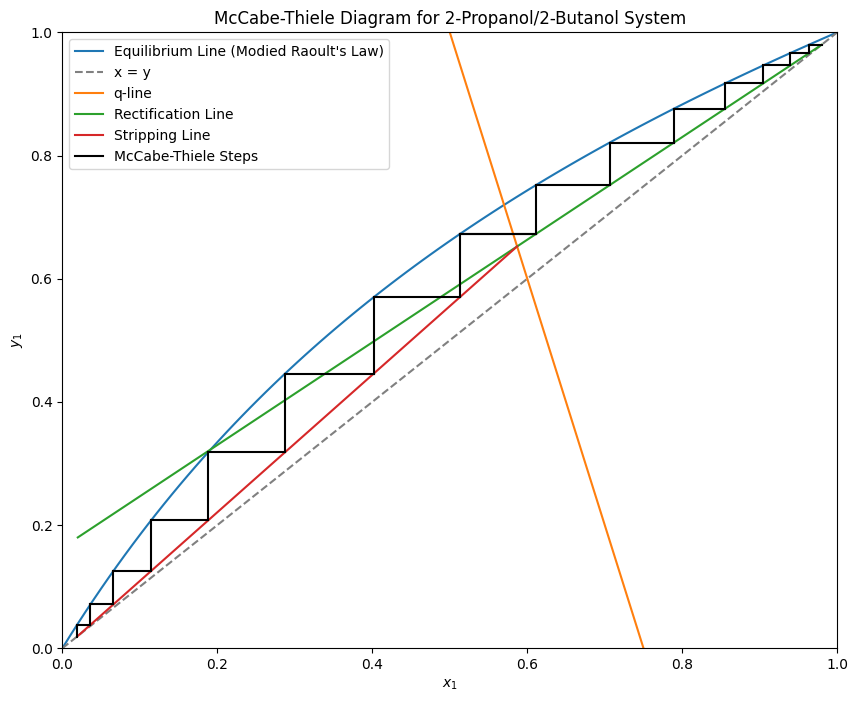

In [54]:
## Plot the previously constructed lines, this is the same as the previous plot
plt.figure(figsize=(10, 8))
plt.plot(x1_discretized, y1_th_corrected, label='Equilibrium Line (Modied Raoult\'s Law)', color='C0')   
plt.plot(x1_discretized, x1_discretized, '--', label='x = y', color='grey')
if q == 1.0:
    plt.axvline(x=xF, linestyle='-', label='q-line', color='C1')                            # for q=1, we need another plotting method to avoid division by zero 
else:
    plt.plot(x_q_line, y_q_line, label='q-line', color='C1')
plt.plot(x_rectification_line, y_rectification_line, label='Rectification Line', color='C2')
plt.plot(x_stripping_line, y_stripping_line, label='Stripping Line', color='C3')

# Construct the McCabe-Thiele steps starting from the top (xD,xD) and moving down the rectification line
x = xD
y = xD
n_step = 0
x_new = np.interp(y, y1_th_corrected, x1_discretized)                                           # interpolate x_new from y1_th_corrected and x1_discretized (first horizontal step until equilibrium line)
plt.plot([x, x_new], [y, y], color='black', label='McCabe-Thiele Steps')                        # plot the horizontal step
while x_new > x_intersection:
    y_new = #<-------------------------------------------------------------------------------------- insert formula here 
    plt.plot([  ,   ], [    ,   ], color='black') #<------------------------------------------------ insert values here                                         
    print(f"Step {n_step}: x = {x:.3f}, y = {y:.3f}, x_new = {x_new:.3f}, y_new = {y_new:.3f}")
    x = #<-------------------------------------------------------------------------------------- insert formula here 
    y = #<-------------------------------------------------------------------------------------- insert formula here 
    x_new = #<-------------------------------------------------------------------------------------- insert formula here 
    plt.plot([  ,   ], [    ,   ], color='black') #<------------------------------------------------ insert values here   
    n_step += 1                                                                                 # count the number of steps

while x > xB:
    x_new = #<-------------------------------------------------------------------------------------- insert formula here 
    plt.plot([  ,   ], [    ,   ], color='black') #<------------------------------------------------ insert values here   
    y_new = #<-------------------------------------------------------------------------------------- insert formula here 
    plt.plot([  ,   ], [    ,   ], color='black') #<------------------------------------------------ insert values here   
    print(f"Step {n_step}: x = {x:.3f}, y = {y:.3f}, x_new = {x_new:.3f}, y_new = {y_new:.3f}")
    x = #<-------------------------------------------------------------------------------------- insert formula here 
    y = #<-------------------------------------------------------------------------------------- insert formula here 
    n_step += 1

print(f"Number of theoretical stages: {n_step}")

plt.xlabel('$x_{1}$')   
plt.ylabel('$y_{1}$')
plt.title('McCabe-Thiele Diagram for 2-Propanol/2-Butanol System')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend()
plt.show()

f) Determine the number of theoretical stages for both reflux ratios (R = 8/3 and R = 5) and compare them to the actual number of stages. What results would you expect, and what might explain any potential differences?

g) Adjust the value of qq while keeping R = 8/3. What does this indicate about the feed quality? How could you modify qq to enhance the performance of the column?

h) What additional measurements would be necessary to compare the composition at each theoretical stage with the composition in the actual distillation column?